In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Đọc file data**

In [ ]:
df = pd.read_csv('data.csv')
df.head(20)

,code,name,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,...,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29
0,HPG,Công ty Cổ phần Tập đoàn Hòa Phát,24.00,24.15,24.00,23.70,23.45,24.00,24.20,24.25,...,42.65,43.30,43.20,43.35,43.80,40.75,41.20,42.50,43.10,43.30
1,AAA,Công ty cổ phần Nhựa An Phát Xanh,12.75,12.70,12.30,12.40,12.00,12.05,12.10,12.00,...,15.85,14.75,14.30,13.70,13.80,12.85,13.30,13.50,13.55,14.05
2,NLG,Công ty Cổ phần Đầu tư Nam Long,27.50,27.00,26.70,26.50,26.35,26.30,26.30,27.05,...,50.80,50.60,49.50,46.05,45.30,42.15,45.10,46.30,46.05,47.20
3,VSN,Công ty cổ phần Việt Nam Kỹ Nghệ Súc Sản,30.00,30.50,29.00,30.40,30.40,30.40,27.60,29.90,...,31.00,30.90,30.90,29.60,30.00,30.10,30.00,29.00,29.90,31.00
4,HNG,Công ty Cổ phần Nông nghiệp Quốc tế Hoàng Anh ...,14.00,14.20,14.20,14.15,14.05,14.05,14.05,14.00,...,8.65,8.05,7.49,6.97,7.14,6.85,7.22,7.38,7.29,7.35
5,AAM,Công ty Cổ phần Thủy sản Mekong,11.95,12.50,12.50,12.50,12.50,12.50,13.00,13.00,...,15.50,16.55,17.35,16.15,15.05,14.00,13.20,14.10,14.90,15.00
6,DAT,Công ty cổ phần Đầu tư Du lịch và Phát triển T...,17.35,17.35,17.35,17.35,17.35,17.35,17.35,17.35,...,20.05,18.65,17.35,16.15,16.60,15.55,15.30,15.95,17.05,17.10
7,ADS,Công ty Cổ phần Damsan,11.55,12.00,11.80,11.55,11.40,11.35,11.25,11.20,...,38.20,37.00,37.30,37.60,37.50,35.00,35.20,35.50,35.10,36.00
8,ACC,Công ty cổ phần Đầu tư và Xây dựng Bình Dương ACC,18.90,19.00,19.00,19.00,19.00,18.90,19.40,19.40,...,18.25,18.40,18.40,17.60,17.80,16.70,16.70,16.75,16.95,17.20
9,AGM,Công ty Cổ phần xuất nhập khẩu An Giang,10.15,10.30,10.25,10.25,10.20,10.30,10.30,10.00,...,52.10,48.50,45.15,42.00,39.10,36.40,33.90,34.60,37.00,39.20


**Tạo bảng dataframe chứa dữ liệu ngày và giá chứng khoán các năm của một công ty**

In [ ]:
# Lấy vị trí của mã chứng khoán
def checkID(id):
  pos = -1
  for i in df["code"]:
    pos+=1
    if i == id: 
      return pos
  return -1

In [ ]:
# Lấy giá đóng cửa của tất cả các ngày theo mã chứng khoán
ID_stock = checkID("HPG")
stock = list(df.iloc[ID_stock])
print(stock)

['HPG', 'Công ty Cổ phần Tập đoàn Hòa Phát', 24.0, 24.15, 24.0, 23.7, 23.45, 24.0, 24.2, 24.25, 25.0, 25.15, 25.3, 25.0, 25.5, 25.85, 26.3, 25.3, 24.1, 24.55, 24.6, 24.45, 25.2, 24.35, 24.35, 23.6, 23.8, 23.7, 23.7, 23.75, 23.3, 23.25, 23.75, 23.55, 22.7, 23.1, 22.75, 22.95, 22.35, 22.3, 22.3, 22.35, 22.35, 22.4, 20.85, 21.65, 20.55, 19.25, 19.05, 19.1, 19.2, 19.7, 19.15, 18.6, 17.3, 17.1, 17.8, 16.95, 16.2, 16.35, 16.85, 17.25, 17.65, 18.85, 19.0, 18.7, 18.55, 18.8, 19.35, 19.95, 20.1, 20.25, 20.7, 21.2, 20.2, 20.8, 21.6, 22.1, 21.95, 21.4, 21.5, 21.0, 21.4, 22.2, 23.6, 23.4, 23.95, 23.65, 24.1, 23.95, 23.5, 25.1, 26.15, 26.45, 26.5, 27.25, 27.3, 28.4, 27.2, 27.2, 27.4, 27.65, 27.05, 26.95, 26.6, 27.05, 27.7, 27.1, 27.0, 25.5, 26.5, 25.4, 26.2, 26.25, 26.8, 27.35, 27.3, 27.0, 27.0, 27.3, 27.2, 26.65, 26.8, 27.4, 27.6, 27.5, 27.6, 28.35, 28.05, 28.15, 27.75, 27.65, 27.9, 28.05, 28.6, 28.55, 28.0, 28.1, 28.1, 28.2, 26.85, 25.95, 27.35, 21.75, 22.1, 21.7, 22.9, 23.0, 24.1, 24.05, 24.2, 2

In [ ]:
# Tạo bảng dataframe
date = list(df.head(0))
column_date = date[2:]
column_stock = stock[2:]
dataframe = pd.DataFrame(column_stock, column_date, columns=["Close"])

# lấy tên công ty
name_company = stock[1]
print(name_company)
dataframe

Công ty Cổ phần Tập đoàn Hòa Phát


,Close
2020-01-02,24.00
2020-01-03,24.15
2020-01-06,24.00
2020-01-07,23.70
2020-01-08,23.45
...,...
2022-04-25,40.75
2022-04-26,41.20
2022-04-27,42.50
2022-04-28,43.10


**Vẽ biểu đồ chứng khoán của công ty**

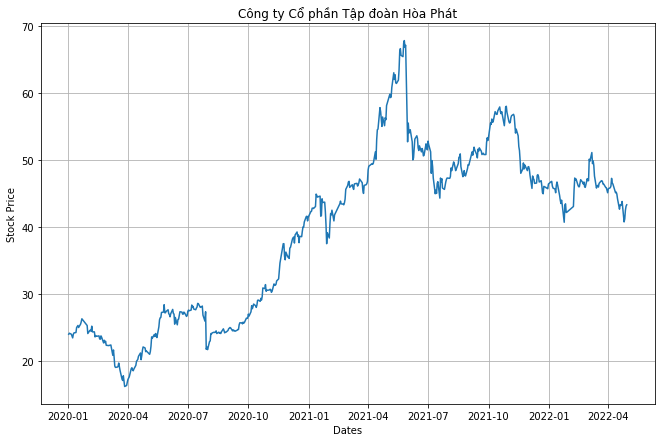

In [ ]:
plt.figure(figsize=(11,7))
plt.grid(True)

x = pd.to_datetime(column_date)
plt.plot(x, dataframe["Close"])
plt.title(name_company)
plt.xlabel("Dates")
plt.ylabel("Stock Price")
plt.show()

**Sử dụng mô hình ARIMA để dự đoán giá chứng khoán**



In [ ]:
# Chia dữ liệu tập train và test
train_data = dataframe[:502]
test_data = dataframe[502:]

print("Dữ liệu tập train \n", train_data)
print("Dữ liệu tập test \n", test_data)

Dữ liệu tập train 
             Close
2020-01-02  24.00
2020-01-03  24.15
2020-01-06  24.00
2020-01-07  23.70
2020-01-08  23.45
...           ...
2021-12-27  45.90
2021-12-28  45.80
2021-12-29  45.80
2021-12-30  45.70
2021-12-31  46.40

[502 rows x 1 columns]
Dữ liệu tập test 
             Close
2022-01-04  46.75
2022-01-05  46.80
2022-01-06  46.10
2022-01-07  45.80
2022-01-10  45.65
...           ...
2022-04-25  40.75
2022-04-26  41.20
2022-04-27  42.50
2022-04-28  43.10
2022-04-29  43.30

[78 rows x 1 columns]


In [ ]:
# Lấy giá chứng khoán
train = train_data['Close'].values
test = test_data['Close'].values

# Sử dụng mô hình ARIMA
history = [x for x in train]
model_predictions = []
N_test_observations = len(test)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()        
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1.0162355717966445


**Vẽ biểu đồ chứng khoán sau khi dự đoán giá chứng khoán bằng mô hình ARIMA**




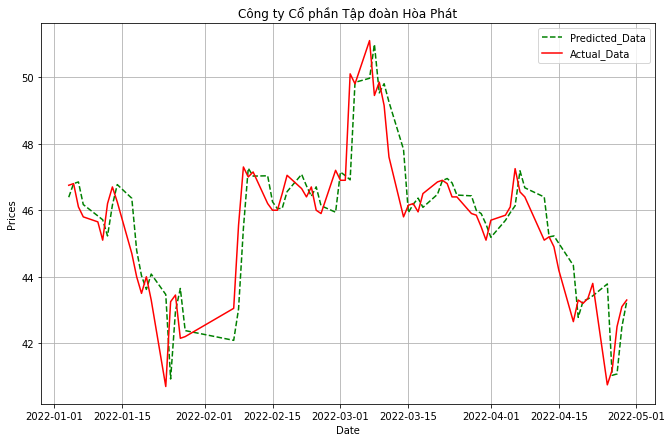

In [ ]:
plt.figure(figsize=(11,7))
plt.grid(True)

date = pd.to_datetime(dataframe[502:].index)

plt.plot(date, model_predictions, color='green',linestyle='dashed',label='Predicted_Data')
plt.plot(date, test_data, color='red', label='Actual_Data')
plt.title(name_company)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()